In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy
import seaborn as sns
%matplotlib inline

In [2]:
def layer_size(X_train, Y_train):
    in_layer = X_train.shape[0]
    out_layer = Y_train.shape[0]
    return in_layer, out_layer


In [3]:
def init_param(in_layer, out_layer):
    W = np.random.randn(out_layer, in_layer) * 0.01
    b = np.zeros((out_layer, 1))
    
    params = {
        "W": W,
        "b": b
    }
    
    return params

In [4]:
def forward_propagation(X_train, W, b):
    y_hat = np.dot(W, X_train) + b
    return y_hat


In [5]:
def compute_cost(Y_train, y_hat):
    cost = np.mean(np.power(y_hat - Y_train, 2)) / 2
    return cost


In [6]:
def back_propagation(X_train, Y_train, y_hat):
    m = X_train.shape[1]
    dz = y_hat - Y_train
    dw = np.dot(dz, X_train.T) / m
    db = np.sum(dz, axis=1, keepdims=True) / m
    grads = {
        "dW": dw,
        "db": db
    }
    
    return grads

In [7]:
def train(X_train, Y_train, alpha, n):
    
    in_layer, out_layer = layer_size(X_train, Y_train)
    params = init_param(in_layer, out_layer)
    cost_ = []
    
    for _ in range(n):
        y_hat = forward_propagation(X_train, params["W"], params["b"])
        cost = compute_cost(Y_train, y_hat)
        grads = back_propagation(X_train, Y_train, y_hat)
        
        params["W"] -= grads["dW"] * alpha
        params["b"] -= grads["db"] * alpha
        cost_.append(cost)
    
    return params, cost_

In [8]:
def predict(X, params):
    y_hat = np.dot(params["W"], X) + params["b"]
    return y_hat


In [11]:
path = "/home/sam/Documents/projects/machine_learning/data/houses.txt"
with open(path) as file:
    data = pd.read_csv(file)
    
print(data)
print(data.columns)

    9.520000000000000000e+02  2.000000000000000000e+00  \
0                     1244.0                       3.0   
1                     1947.0                       3.0   
2                     1725.0                       3.0   
3                     1959.0                       3.0   
4                     1314.0                       2.0   
..                       ...                       ...   
94                    1224.0                       2.0   
95                    1432.0                       2.0   
96                    1660.0                       3.0   
97                    1212.0                       3.0   
98                    1050.0                       2.0   

    1.000000000000000000e+00  6.500000000000000000e+01  \
0                        1.0                      64.0   
1                        2.0                      17.0   
2                        2.0                      42.0   
3                        2.0                      15.0   
4            

In [20]:
X = np.array([data["9.520000000000000000e+02"],
             data["2.000000000000000000e+00"],
             data["1.000000000000000000e+00"],
             data["6.500000000000000000e+01"]])
Y = np.array(data["2.715000000000000000e+02"])

print(X.shape)
print(X[:, :10])
print(Y.shape)
print(Y)

(4, 99)
[[1.244e+03 1.947e+03 1.725e+03 1.959e+03 1.314e+03 8.640e+02 1.836e+03
  1.026e+03 3.194e+03 7.880e+02]
 [3.000e+00 3.000e+00 3.000e+00 3.000e+00 2.000e+00 2.000e+00 3.000e+00
  3.000e+00 4.000e+00 2.000e+00]
 [1.000e+00 2.000e+00 2.000e+00 2.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 2.000e+00 1.000e+00]
 [6.400e+01 1.700e+01 4.200e+01 1.500e+01 1.400e+01 6.600e+01 1.700e+01
  4.300e+01 8.700e+01 8.000e+01]]
(99,)
[300.    509.8   394.    540.    415.    230.    560.    294.    718.2
 200.    302.    468.    374.2   388.    282.    311.8   401.    449.8
 301.    502.    340.    400.282 572.    264.    304.    298.    219.8
 490.7   216.96  368.2   280.    526.87  237.    562.426 369.8   460.
 374.    390.    158.    426.    390.    277.774 216.96  425.8   504.
 329.    464.    220.    358.    478.    334.    426.98  290.    463.
 390.8   354.    350.    460.    237.    288.304 282.    249.    304.
 332.    351.8   310.    216.96  666.336 330.    480.    330.3   348.
 3

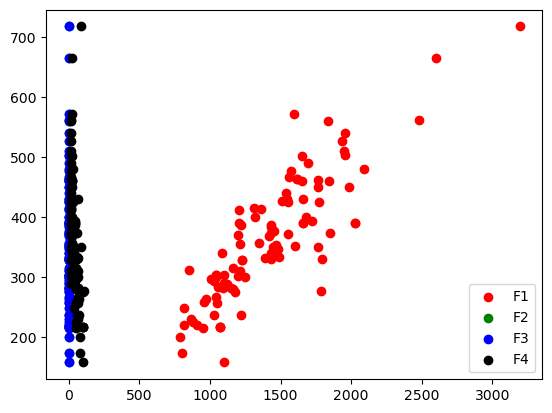

In [22]:
plt.scatter(X[0, :], Y, color="red", label="F1")
plt.scatter(X[1, :], Y, color="green", label="F2")
plt.scatter(X[2, :], Y, color="blue", label="F3")
plt.scatter(X[3, :], Y, color="black", label="F4")
plt.legend()
plt.show()

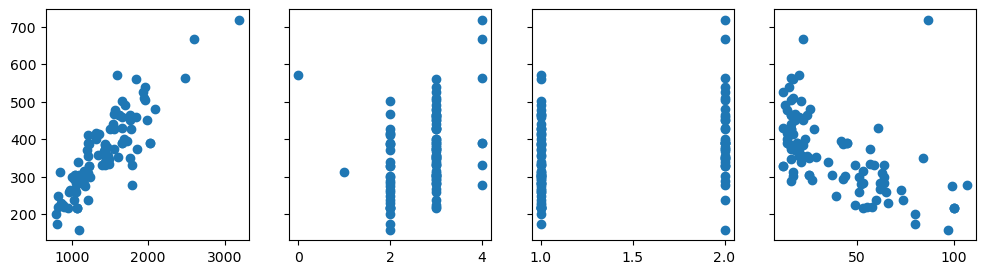

In [23]:
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[i, :],Y)
plt.show()

In [25]:
params_, cost_ = train(X, Y.reshape((1, 99)), 0.01, 100)
print(params_)
print(cost_)

{'W': array([[nan, nan, nan, nan]]), 'b': array([[nan]])}
[70922.0613141371, 33026554162262.324, 1.5729339518440431e+22, 7.491308981302693e+30, 3.5678364109029465e+39, 1.699229959241548e+48, 8.092810661274954e+56, 3.8543096561502857e+65, 1.8356666858128301e+74, 8.742608876861011e+82, 4.163784774463258e+91, 1.9830583630405813e+100, 9.44458151474008e+108, 4.4981086614012425e+117, 2.1422845997141778e+126, 1.0202917829785952e+135, 4.859276505803802e+143, 2.3142956312872877e+152, 1.1022143445836834e+161, 5.249443696742768e+169, 2.5001179907235557e+178, 1.1907147363858804e+187, 5.670938686522446e+195, 2.7008606346730227e+204, 1.2863211138682959e+213, 6.1262768864921055e+221, 2.9177215615392733e+230, 1.3896040398438074e+239, 6.61817567859872e+247, 3.151994960932814e+256, 1.5011798894781577e+265, 7.149570632266275e+273, 3.4050789371774466e+282, 1.621714528713485e+291, 7.723633023381358e+299, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf

/tmp/ipykernel_6257/263249595.py:2: RuntimeWarning: overflow encountered in power
  cost = np.mean(np.power(y_hat - Y_train, 2)) / 2


In [26]:
params_, cost_ = train(X, Y.reshape((1, 99)), 0.1, 100)
print(params_)
print(cost_)

{'W': array([[nan, nan, nan, nan]]), 'b': array([[nan]])}
[71081.91769773362, 3310328260670991.0, 1.5767182865729516e+26, 7.509951766031887e+36, 3.577010300978456e+47, 1.7037396633063347e+58, 8.114958012643041e+68, 3.8651764095908793e+79, 1.8409939588081772e+90, 8.768703927609216e+100, 4.176557353824585e+111, 1.989305543190146e+122, 9.475116008028006e+132, 4.513023334847625e+143, 2.149565198317619e+154, 1.0238437071972896e+165, 4.87659521836285e+175, 2.3227354679806513e+186, 1.106325174150196e+197, 5.269456672233747e+207, 2.509856439077926e+218, 1.195451397859314e+229, 5.693967281924754e+239, 2.7120519885363878e+250, 1.2917576839391084e+261, 6.152676722529354e+271, 2.930536533486495e+282, 1.3958224625474085e+293, 6.648340072505326e+303, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

/tmp/ipykernel_6257/263249595.py:2: RuntimeWarning: overflow encountered in power
  cost = np.mean(np.power(y_hat - Y_train, 2)) / 2


In [27]:
params_, cost_ = train(X, Y.reshape((1, 99)), 0.1, 100)
print(params_)
print(cost_)

{'W': array([[nan, nan, nan, nan]]), 'b': array([[nan]])}
[73550.21620172757, 3427393813495663.0, 1.632476925388125e+26, 7.775531668039432e+36, 3.703506725297808e+47, 1.7639902517154187e+58, 8.401933191836749e+68, 4.001863462195403e+79, 1.9060983709813998e+90, 9.07879800043149e+100, 4.3242559978790895e+111, 2.0596548060992838e+122, 9.810191446502078e+132, 4.6726206708049395e+143, 2.225581840303282e+154, 1.0600506389992206e+165, 5.049049812023661e+175, 2.40487605652157e+186, 1.1454489582293774e+197, 5.455804312038139e+207, 2.5986143230044598e+218, 1.2377270175955534e+229, 5.8953272000546665e+239, 2.807960261158418e+250, 1.3374390531151072e+261, 6.370258317186767e+271, 3.0341712344326646e+282, 1.44518395039344e+293, 6.883450171741253e+303, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

/tmp/ipykernel_6257/263249595.py:2: RuntimeWarning: overflow encountered in power
  cost = np.mean(np.power(y_hat - Y_train, 2)) / 2


<p>z-score normalization</p>

In [34]:
x1 = np.array(X[0, :])
x2 = np.array(X[1, :])
x3 = np.array(X[2, :])
x4 = np.array(X[3, :])
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
x3 = (x3 - np.mean(x3)) / np.std(x3)
x4 = (x4 - np.mean(x4)) / np.std(x4)
Y_norm = (Y - np.mean(Y)) / np.std(Y)
X_norm = np.array([x1, x2, x3, x4])
print(X_norm.shape)

(4, 99)


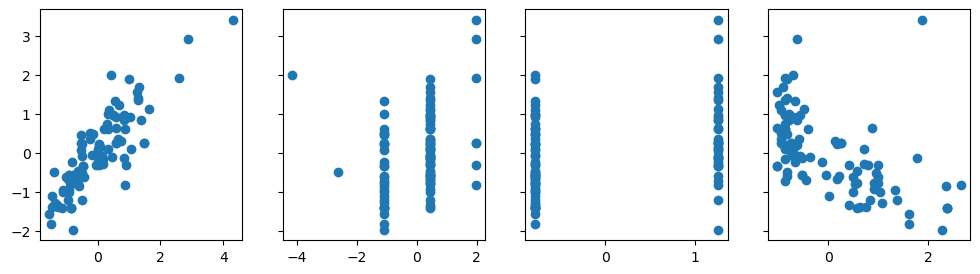

In [46]:
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[i, :],Y_norm)
plt.show()

<p>Min-Max normalization</p>

In [47]:
x11 = np.array(X[0, :])
x21 = np.array(X[1, :])
x31 = np.array(X[2, :])
x41 = np.array(X[3, :])
x11 = (x11 - np.mean(x11)) / (np.max(x11) - np.min(x11))
x21 = (x21 - np.mean(x21)) / (np.max(x21) - np.min(x21))
x31 = (x31 - np.mean(x31)) / (np.max(x31) - np.min(x31))
x41 = (x41 - np.mean(x41)) / (np.max(x41) - np.min(x41))
Y_norm1 = (Y - np.mean(Y)) / (np.max(Y) - np.min(Y))
X_norm1 = np.array([x11, x21, x31, x41])
print(X_norm1.shape)

(4, 99)


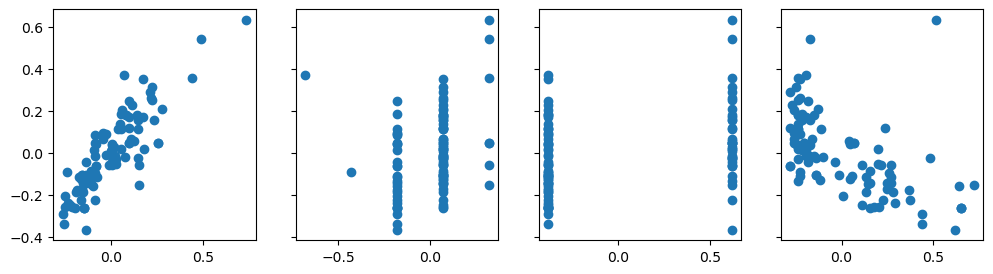

In [48]:
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm1[i, :],Y_norm1)
plt.show()

In [36]:
params, cost = train(X_norm, Y_norm.reshape((1, 99)), 0.01, 100)
print(params)
print(cost)

{'W': array([[ 0.46582953,  0.04096761,  0.04675628, -0.31019568]]), 'b': array([[1.62846728e-16]])}
[0.5030850408483407, 0.49053086973535537, 0.4784305516179406, 0.46676598965611554, 0.4555198288277112, 0.44467542523700015, 0.43421681669777007, 0.4241286945378358, 0.4143963765741955, 0.4050057812101439, 0.3959434026076864, 0.38719628689053703, 0.37875200933484793, 0.3705986525065958, 0.3627247853062639, 0.3551194428830966, 0.3477721073827711, 0.3406726894938357, 0.3338115107597086, 0.32717928662440826, 0.3207671101815174, 0.3145664365971432, 0.30856906817886226, 0.3027671400637951, 0.2971531065000813, 0.29171972769708915, 0.28646005722072493, 0.2813674299111881, 0.27643545030146327, 0.2716579815157377, 0.26702913462780803, 0.2625432584603586, 0.2581949298067986, 0.2539789440581001, 0.2498903062178137, 0.24592422228913607, 0.24207609101857547, 0.23834149598140428, 0.2347161979947017, 0.23119612784438387, 0.22777737931318048, 0.22445620249706275, 0.22122899739814392, 0.218092307782575, 

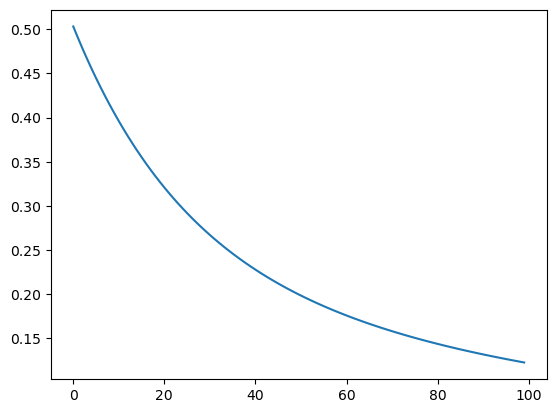

In [37]:
plt.plot(cost)
plt.show()

In [38]:
params1, cost1 = train(X_norm, Y_norm.reshape((1, 99)), 0.03, 100)
print(params1)
print(cost1)

{'W': array([[ 0.77570304, -0.06882757, -0.13517739, -0.39430784]]), 'b': array([[3.00193372e-16]])}
[0.497939532594117, 0.4618497331408424, 0.4295415513147822, 0.40057553701284104, 0.37456493396252355, 0.3511692902506387, 0.33008884718497533, 0.3110596114833812, 0.29384902739210367, 0.27825217552391684, 0.26408843414991207, 0.2511985465291078, 0.23944204475087516, 0.22869498661385584, 0.2188479673745298, 0.20980437285922848, 0.20147884452450407, 0.19379593064197084, 0.18668890093614185, 0.1800987047710281, 0.17397305541042285, 0.1682656250091945, 0.16293533686481362, 0.15794574310159495, 0.15326447740268206, 0.1488627736711652, 0.1447150426134457, 0.14079849921392357, 0.13709283492689486, 0.13357992916374664, 0.13024359531392501, 0.1270693571179302, 0.12404425171962308, 0.12115665617204129, 0.11839613456331646, 0.11575330327381204, 0.11321971217811079, 0.11078773987110613, 0.10845050123069089, 0.1062017658343528, 0.10403588592684064, 0.10194773279401244, 0.09993264053668471, 0.0979863

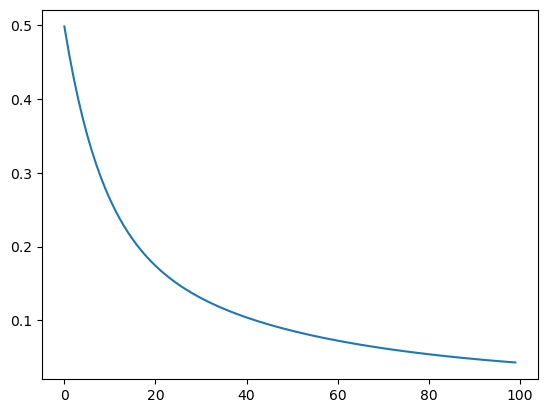

In [39]:
plt.plot(cost1)
plt.show()

In [40]:
params2, cost2 = train(X_norm, Y_norm.reshape((1, 99)), 0.06, 100)
print(params2)
print(cost2)

{'W': array([[ 0.95693705, -0.15400664, -0.25241265, -0.38271988]]), 'b': array([[3.34673366e-16]])}
[0.5127622496604544, 0.439765485872844, 0.38162280199305854, 0.3349910580089835, 0.29730293885113274, 0.2665849331583552, 0.24131821081045254, 0.22033226834497321, 0.2027236061109347, 0.1877935294308661, 0.17500056209722528, 0.1639240264853301, 0.15423615849663133, 0.1456807470592169, 0.13805676251323507, 0.13120580063973944, 0.12500244587691828, 0.11934686865860467, 0.11415913326756096, 0.10937481592477799, 0.10494162704870737, 0.10081680359636827, 0.09696509239582464, 0.0933571874084534, 0.0899685159830517, 0.0867782937213012, 0.08376878635165491, 0.08092473137040569, 0.07823288319626431, 0.0756816539938381, 0.07326082875963907, 0.0709613381958452, 0.06877507667658705, 0.06669475550995066, 0.06471378392317635, 0.06282617190689274, 0.061026450367562005, 0.05930960504806956, 0.057671021455242305, 0.05610643863409399, 0.05461191009312516, 0.053183770544713016, 0.051818607403743736, 0.050

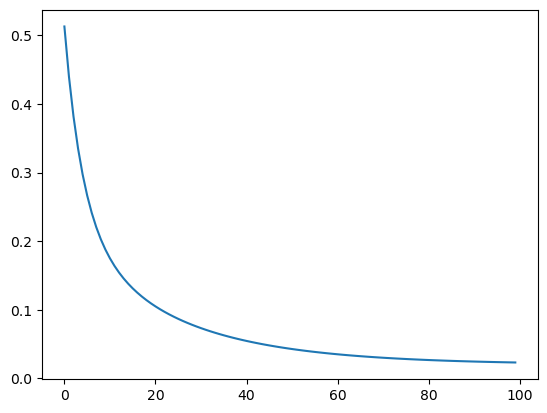

In [41]:
plt.plot(cost2)
plt.show()

In [42]:
params3, cost3 = train(X_norm, Y_norm.reshape((1, 99)), 0.1, 100)
print(params3)
print(cost3)

{'W': array([[ 1.0350723 , -0.19118987, -0.29910374, -0.36941752]]), 'b': array([[3.3629104e-16]])}
[0.4991627204716518, 0.38582137308633413, 0.3090501074422121, 0.25578393472406136, 0.21777643444142014, 0.1898018289081224, 0.1685312084333203, 0.15182955816936908, 0.13831554915636157, 0.12708549236405262, 0.11753992232814006, 0.10927439729732, 0.10201052590982512, 0.09555222979155174, 0.08975786817749107, 0.08452235739795395, 0.07976560847205814, 0.07542497504952766, 0.07145026023145332, 0.06780036694174237, 0.0644410126535988, 0.0613431403741349, 0.05848179065869085, 0.055835283294350085, 0.05338461042390248, 0.05111297669789982, 0.04900544369147988, 0.047048649783473145, 0.045230585779099775, 0.04354041253216853, 0.04196831080273832, 0.04050535627682042, 0.03914341452383469, 0.03787505196128357, 0.03669345981842006, 0.03559238876080664, 0.03456609233366259, 0.03360927775550711, 0.032717062879570435, 0.03188493836246711, 0.031108734254157454, 0.03038459036188453, 0.029708929851933488,

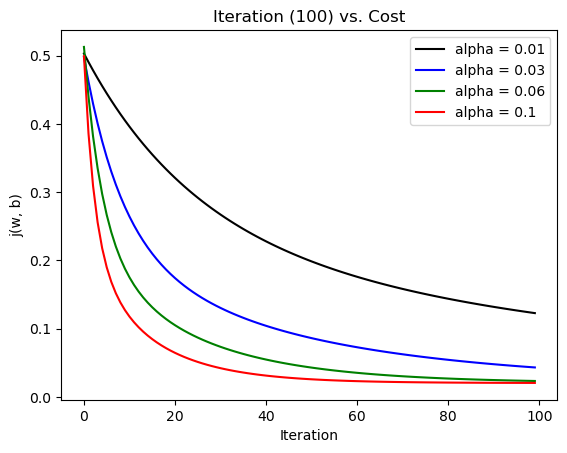

In [45]:
plt.plot(cost, color="black", label="alpha = 0.01")
plt.plot(cost1, color="blue", label="alpha = 0.03")
plt.plot(cost2, color="green", label="alpha = 0.06")
plt.plot(cost3, color="red", label="alpha = 0.1")
plt.xlabel("Iteration")
plt.ylabel("j(w, b)")
plt.title("Iteration (100) vs. Cost")
plt.legend()
plt.show()